# Exploring the BIG5 dataset from the [Open-Source Psychometrics Project](https://openpsychometrics.org/)



In [9]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

In [10]:
big5_df = pd.read_csv('data/openpsych_data.csv', sep='\t')

In [11]:
big5_df.columns

Index(['race', 'age', 'engnat', 'gender', 'hand', 'source', 'country', 'E1',
       'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'N1', 'N2', 'N3',
       'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10', 'A1', 'A2', 'A3', 'A4', 'A5',
       'A6', 'A7', 'A8', 'A9', 'A10', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7',
       'C8', 'C9', 'C10', 'O1', 'O2', 'O3', 'O4', 'O5', 'O6', 'O7', 'O8', 'O9',
       'O10'],
      dtype='str')

In [12]:
race_values = '''1=Mixed Race, 2=Arctic (Siberian, Eskimo), 3=Caucasian (European), 
4=Caucasian (Indian), 5=Caucasian (Middle East), 6=Caucasian (North African, Other), 
7=Indigenous Australian, 8=Native American, 
9=North East Asian (Mongol, Tibetan, Korean Japanese, etc), 
10=Pacific (Polynesian, Micronesian, etc), 
11=South East Asian (Chinese, Thai, Malay, Filipino, etc), 12=West African, Bushmen, Ethiopian, 13=Other, 0=missed
'''

parts = re.split(r'(?:,\s+)?([0-9]+)=', race_values.strip())

race_keys = [int(key_val) for key_val in parts[1::2]]
race_values = parts[2::2]

In [13]:
race_mapping = dict(zip(race_keys,race_values))
race_mapping

{1: 'Mixed Race',
 2: 'Arctic (Siberian, Eskimo)',
 3: 'Caucasian (European)',
 4: 'Caucasian (Indian)',
 5: 'Caucasian (Middle East)',
 6: 'Caucasian (North African, Other)',
 7: 'Indigenous Australian',
 8: 'Native American',
 9: 'North East Asian (Mongol, Tibetan, Korean Japanese, etc)',
 10: 'Pacific (Polynesian, Micronesian, etc)',
 11: 'South East Asian (Chinese, Thai, Malay, Filipino, etc)',
 12: 'West African, Bushmen, Ethiopian',
 13: 'Other',
 0: 'missed'}

In [14]:
big5_df=big5_df.assign(race_cat=big5_df['race'].map(race_mapping))

In [15]:
(big5_df['race_cat'].value_counts()

SyntaxError: incomplete input (3256161567.py, line 1)

### `age`

age	entered as text (individuals reporting age < 13 were not recorded)


In [16]:
big5_df['age'].max()

np.int64(999999999)

In [17]:
big5_df['age'].value_counts().tail(50)

age
68           20
67           19
69           15
70           12
71           11
1992          9
72            8
1994          8
1996          7
1995          5
1993          5
75            5
1989          5
1997          4
1982          4
1998          4
1991          3
1990          3
77            3
188           2
1976          2
1984          2
74            2
76            2
73            2
1986          2
79            2
1985          2
1999          1
1988          1
100           1
208           1
999999999     1
1961          1
1977          1
412434        1
92            1
2000          1
80            1
1974          1
97            1
1968          1
211           1
223           1
99            1
266           1
191           1
78            1
1964          1
118           1
Name: count, dtype: int64

In [18]:
big5_dfbig5_df['age']>100]['age'].value_counts()

SyntaxError: unmatched ']' (4158236042.py, line 1)

### `gender`
gender	Chosen from a drop down menu. 1=Male, 2=Female, 3=Other (0=missed)



In [19]:
gender_map = {
    0: pd.NA,
    1: 'male',
    2: 'female',
    3: 'other'
}

In [20]:
big5_df['gender'].value_counts()

gender
2    11985
1     7608
3      102
0       24
Name: count, dtype: int64

In [21]:
big5_df=big5_df.assign(gender_cat=big5_df['gender'].map(gender_map))

In [22]:
big5_df['gender_cat'].value_counts()

gender_cat
female    11985
male       7608
other       102
Name: count, dtype: int64

### `hand`

hand	"What hand do you use to write with?". 1=Right, 2=Left, 3=Both (0=missed)


In [23]:
big5_df['hand'].value_counts()

hand
1    17424
2     1724
3      471
0      100
Name: count, dtype: int64

### `source`

How the participant came to the test. Based on HTTP Referer. 1=from another page on the test website, 2=from google, 3=from facebook, 4=from any url with ".edu" in its domain name (e.g. xxx.edu, xxx.edu.au), 6=other source, or HTTP Referer not provided.

In [24]:
big5_df['source'].value_counts()

source
1    12099
2     3653
5     3527
3      303
4      137
Name: count, dtype: int64

### `country`

The participant's technical location. ISO country code.

In [25]:
big5_df['country'].value_counts().head(50)

country
US     8753
GB     1531
IN     1464
AU      974
CA      924
PH      649
(nu     369
IT      277
MY      247
PK      222
DE      191
ZA      179
BR      175
ID      172
SE      169
NZ      157
NO      147
RO      135
SG      133
NL      133
FR      129
DK      122
IE      107
AE      100
FI       90
PT       88
BE       86
RS       85
GR       85
MX       82
ES       82
PL       79
TR       70
EG       49
SA       45
BD       44
KE       43
TH       42
LB       41
BG       41
AR       41
HK       41
HR       40
CN       40
CH       40
JP       37
NG       35
SI       34
HU       34
LK       31
Name: count, dtype: int64

In [26]:
big5_df['country'].value_counts().head(20)

country
US     8753
GB     1531
IN     1464
AU      974
CA      924
PH      649
(nu     369
IT      277
MY      247
PK      222
DE      191
ZA      179
BR      175
ID      172
SE      169
NZ      157
NO      147
RO      135
SG      133
NL      133
Name: count, dtype: int64

In [27]:
big5_df['country'].nunique()

158

---

## Scoring

* https://ipip.ori.org/newScoringInstructions.htm

> Here is how to score IPIP scales:
>
> For + keyed items, the response "Very Inaccurate" is assigned a value of 1, "Moderately Inaccurate" a value of 2, "Neither Inaccurate nor Accurate" a 3, "Moderately Accurate" a 4, and "Very Accurate" a value of 5.
>
> For - keyed items, the response "Very Inaccurate" is assigned a value of 5, "Moderately Inaccurate" a value of 4, "Neither Inaccurate nor Accurate" a 3, "Moderately Accurate" a 2, and "Very Accurate" a value of 1.
>
> Once numbers are assigned for all of the items in the scale, just sum all the values to obtain a total scale score.


---

### Keyed items

https://ipip.ori.org/new_ipip-50-item-scale.htm

In [28]:
questions = '''
E1	I am the life of the party.
E2	I don't talk a lot.
E3	I feel comfortable around people.
E4	I keep in the background.
E5	I start conversations.
E6	I have little to say.
E7	I talk to a lot of different people at parties.
E8	I don't like to draw attention to myself.
E9	I don't mind being the center of attention.
E10	I am quiet around strangers.
N1	I get stressed out easily.
N2	I am relaxed most of the time.
N3	I worry about things.
N4	I seldom feel blue.
N5	I am easily disturbed.
N6	I get upset easily.
N7	I change my mood a lot.
N8	I have frequent mood swings.
N9	I get irritated easily.
N10	I often feel blue.
A1	I feel little concern for others.
A2	I am interested in people.
A3	I insult people.
A4	I sympathize with others' feelings.
A5	I am not interested in other people's problems.
A6	I have a soft heart.
A7	I am not really interested in others.
A8	I take time out for others.
A9	I feel others' emotions.
A10	I make people feel at ease.
C1	I am always prepared.
C2	I leave my belongings around.
C3	I pay attention to details.
C4	I make a mess of things.
C5	I get chores done right away.
C6	I often forget to put things back in their proper place.
C7	I like order.
C8	I shirk my duties.
C9	I follow a schedule.
C10	I am exacting in my work.
O1	I have a rich vocabulary.
O2	I have difficulty understanding abstract ideas.
O3	I have a vivid imagination.
O4	I am not interested in abstract ideas.
O5	I have excellent ideas.
O6	I do not have a good imagination.
O7	I am quick to understand things.
O8	I use difficult words.
O9	I spend time reflecting on things.
O10	I am full of ideas.
'''


In [29]:
big5_questions_df = pd.DataFrame([item.split('\t') for item in questions.splitlines() if item>''])

In [30]:
big5_questions_df

,0,1
0,E1,I am the life of the party.
1,E2,I don't talk a lot.
2,E3,I feel comfortable around people.
3,E4,I keep in the background.
4,E5,I start conversations.
5,E6,I have little to say.
6,E7,I talk to a lot of different people at parties.
7,E8,I don't like to draw attention to myself.
8,E9,I don't mind being the center of attention.
9,E10,I am quiet around strangers.


---

### Questions and direction key

https://ipip.ori.org/new_ipip-50-item-scale.htm

In [31]:
factor_map = { 1: 'E', 
               2: 'A',
               3: 'C',
               4: 'N',
               5: 'O' }

In [32]:
ipip_df = pd.read_html('big5_questions.html', header=0)[0]
ipip_df = ipip_df.rename(columns={'Unnamed: 1': 'text', 'Unnamed: 7': 'factor_and_direction'})[['text','factor_and_direction']]
ipip_df[['factor','direction']]=ipip_df['factor_and_direction'].str.extract(r'([1-5])(.)')
ipip_df['category']=ipip_df['factor'].astype(int).map(factor_map)

FileNotFoundError: [Errno 2] No such file or directory: big5_questions.html

In [33]:
ipip_df = ipip_df.assign(number=np.repeat(np.arange(1,11),5))
ipip_df = ipip_df.assign(qcode=ipip_df['category'].str.cat(ipip_df['number'].astype(str)))   

NameError: name 'ipip_df' is not defined

In [34]:
neg_items = ipip_df.query('direction=="-"')['qcode']
neg_items

NameError: name 'ipip_df' is not defined

* Make a copy of the original dataframe to keep available in case of mistakes

In [35]:
big5_scored_df = big5_df.copy()

* Reverse code the `negatively` keyed items

In [36]:
big5_scored_df[neg_items] = 6-big5_df[neg_items]

NameError: name 'neg_items' is not defined

In [37]:
E_cols = [f'E{n+1}' for n in range(10)]
E_cols

['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10']

In [38]:
cat_cols = {
    cat : [f'{cat}{n+1}' for n in range(10)] 
    for cat in ('O','C','E','A','N') 
}

In [39]:
cat_cols

{'O': ['O1', 'O2', 'O3', 'O4', 'O5', 'O6', 'O7', 'O8', 'O9', 'O10'],
 'C': ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10'],
 'E': ['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10'],
 'A': ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10'],
 'N': ['N1', 'N2', 'N3', 'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10']}

In [40]:
for cat, cols in cat_cols.items():
    big5_scored_df[cat]=big5_scored_df[cols].sum(axis=1)

In [41]:
big5_scored_df[['O','C','E','A','N']]

,O,C,E,A,N
0,31,31,32,32,19
1,26,28,28,31,29
2,41,33,29,38,46
3,37,34,36,37,43
4,22,26,26,40,32
...,...,...,...,...,...
19714,31,34,29,34,41
19715,26,30,29,28,25
19716,33,37,35,34,42
19717,36,35,29,32,38


In [42]:
gender_dist_df = (
    big5_scored_df.
        groupby('gender_cat')[['O','C','E','A','N']].
        agg('mean').
        round(1)
)

gender_dist_df

,O,C,E,A,N
gender_cat,,,,,
female,32.9,31.7,30.6,32.2,31.7
male,33.5,31.3,31.1,31.8,29.7
other,34.3,32.3,29.8,31.2,32.9


<Axes: >

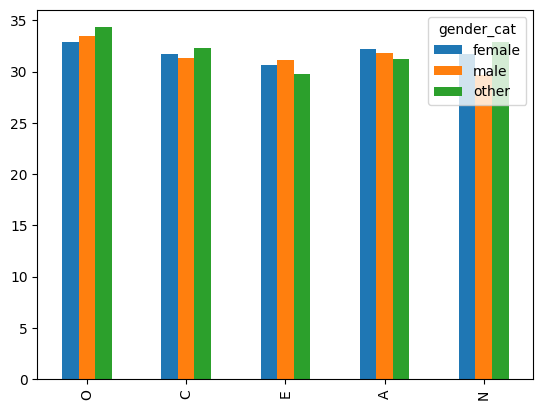

In [36]:
gender_dist_df.transpose().plot(kind='bar')

#### coming from a half asian, half white family, my asian family is less culturally extroverted. I was interested in identifyinf if this was actually a thing
according to world population review..

* i looked up countires that are the most extroverted, and the least
* most = colombia, nigeria, phillipines, mexico
* least = finland, japan, germany, south korea

In [37]:
extrovert = (
    big5_scored_df
        .groupby('gender_cat')[['E', 'A']]
        .mean()
        .round(1)
)

extrovert

,E,A
gender_cat,,
female,30.6,32.2
male,31.1,31.8
other,29.8,31.2


<Axes: >

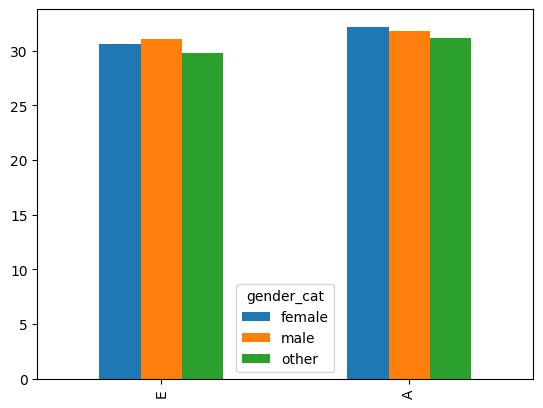

In [38]:
extrovert.transpose().plot(kind='bar')

In [42]:
asian_white = (
    big5_scored_df
        .query('country in ["CN","JP","KR","US","CA","GB"]')
        .groupby('country')['E']
        .mean()
        .round(1)
)

In [45]:
color_map = {
    'US': 'darkred',
    'CA': 'indianred',
    'GB': 'salmon',
    'CN': 'navy',
    'JP': 'royalblue',
    'KR': 'skyblue'
}

colors = [color_map[c] for c in asian_white.index]

<Axes: xlabel='country'>

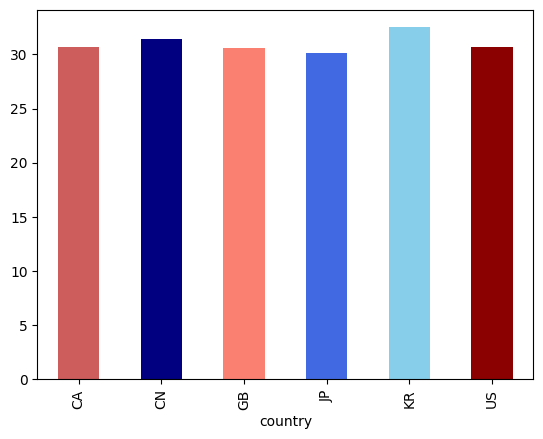

In [46]:
asian_white.transpose().plot(
    kind='bar',
    color=colors
)

In [46]:
extrovert_countries = (
    big5_scored_df
        .query('country in ["CO","NG","PH","FI","JP","DE"]')
        .groupby('country')['E']
        .mean()
        .round(1)
)

In [49]:
color_map = {
    'CO': '#FFD700',   # gold
    'NG': '#FFA500',   # orange
    'PH': '#FFB347',   # light orange

    'FI': '#6A0DAD',   # deep purple
    'JP': '#8A2BE2',   # blue violet
    'DE': '#BA55D3'    # medium orchid
}


In [50]:
colors = [color_map[c] for c in extrovert_countries.index]


<Axes: xlabel='country'>

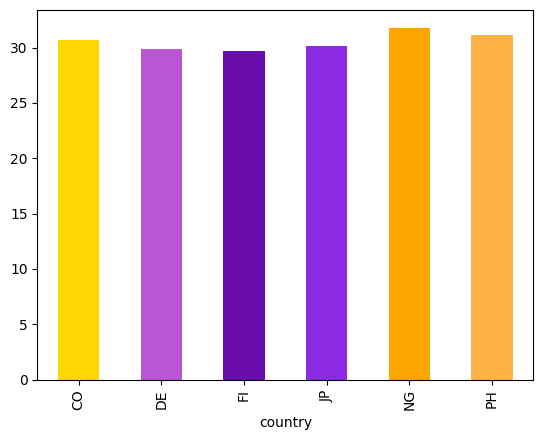

In [51]:
extrovert_countries.transpose().plot(
    kind='bar',
    color=colors
)

<Axes: xlabel='country'>

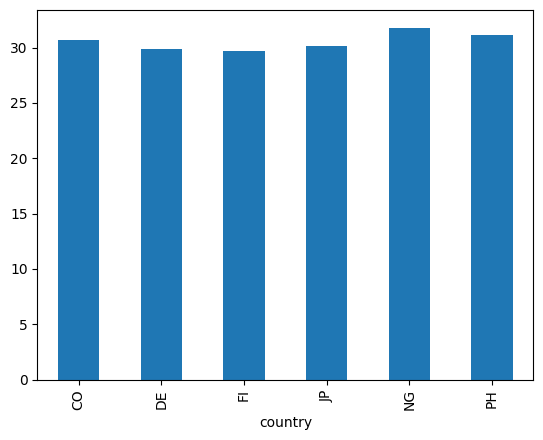

In [59]:
extrovert_countries.transpose().plot(kind='bar')

#### then i was kind of interested to see the most "emotionally stable" countries

i clicked on a forbes article with "emotionally aware" countries, and this is what it said..

* most = phillippines, el salvador, bahrain, oman
* least = singapore, georgia, lithuania, russia

In [52]:
emotional_stability_countries = (
    big5_scored_df
        .query('country in ["PH","SV","BH","SG","GE","LT"]')
        .groupby('country')['N']
        .mean()
        .round(1)
)

In [53]:
color_map = {
    'BH': '#006400',   # dark green
    'GE': '#228B22',   # forest green
    'LT': '#90EE90',   # light green

    'SV': '#FF7F7F',   # light red
    'SG': '#DC143C',   # crimson
    'PH': '#8B0000'    # dark red
}


In [54]:
colors = [color_map[c] for c in emotional_stability_countries.index]


<Axes: xlabel='country'>

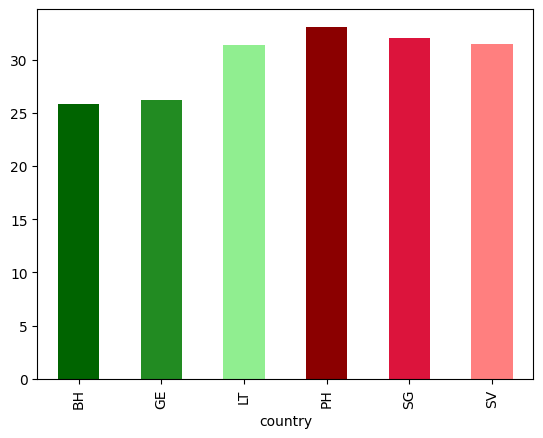

In [55]:
emotional_stability_countries.transpose().plot(
    kind='bar',
    color=colors
)


<Axes: xlabel='country'>

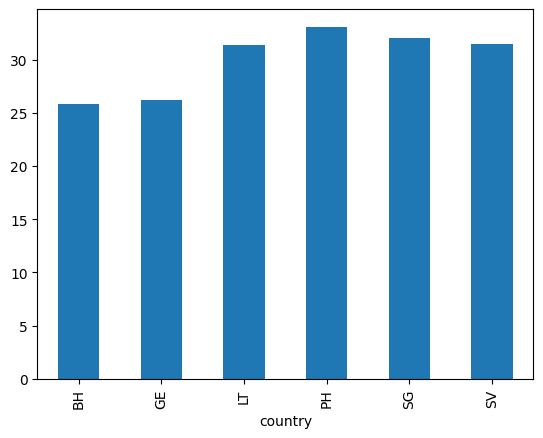

In [75]:
emotional_stability_countries.transpose().plot(kind='bar')

#### as you can see, this isn't really what I was looking for. I found out that Gallup condcuts a study every year on the World's Emotional Health on 148 countries. latin americans were among the most emotional. former soviet union countires dominate the least emotional spectrum. 
here is what it said..
* most emotional: bolivia, cambodia, phillippines, guetamala
* least emotional: georgia, ukraine, lithuania, mongolia

In [56]:
emotional_countries = (
    big5_scored_df
        .query('country in ["BO","PH","GT","LT","UA","GE"]')
        .groupby('country')['N']
        .mean()
        .round(1)
)

In [58]:
color_map = {
    # Least emotional → greens
    'GE': '#006400',   # dark green
    'UA': '#228B22',   # forest green
    'LT': '#90EE90',   # light green
    
    # Most emotional → reds
    'BO': '#8B0000',   # dark red
    'PH': '#DC143C',   # crimson
    'GT': '#FF7F7F'    # light red
}


In [59]:
colors = [color_map[c] for c in emotional_countries.index]


<Axes: xlabel='country'>

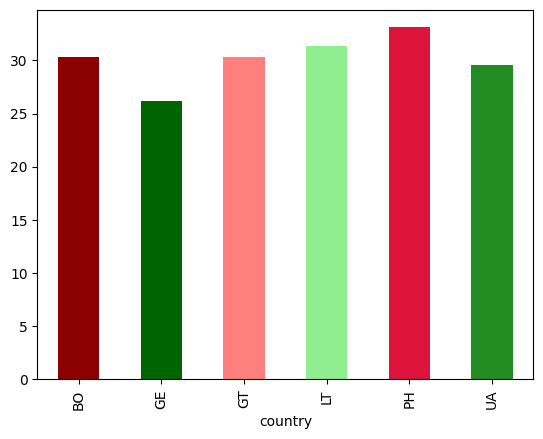

In [60]:
emotional_countries.transpose().plot(
    kind='bar',
    color=colors
)


<Axes: xlabel='country'>

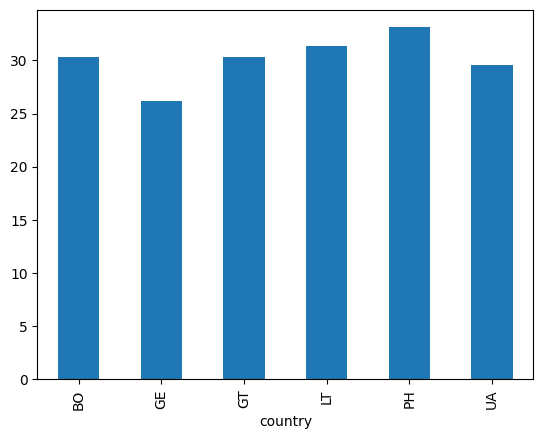

In [57]:
emotional_countries.transpose().plot(kind='bar')

#### though this was a little better, I continue to have inconclusive results. I wanted to be clear, so I sorted which countries actually ranked the lowest in emotional stability- out of curiosity

In [114]:
big5_scored_df.groupby('country')['N'].mean().sort_values().head(5)

country
AO    18.0
CV    19.0
ET    19.0
GU    20.0
SY    20.0
Name: N, dtype: float64

#### syria, guam, ethiopia, cape verde, angola

In [113]:
big5_scored_df.groupby('country')['N'].mean().sort_values(ascending=False).head(5)

country
GD    50.0
AG    45.0
GP    39.0
SR    39.0
BT    39.0
Name: N, dtype: float64

#### suriname, guadeloupe, antigua and barbuda, grenada, bhutan

In [39]:
gender_dist_df.transpose()

gender_cat,female,male,other
O,32.9,33.5,34.3
C,31.7,31.3,32.3
E,30.6,31.1,29.8
A,32.2,31.8,31.2
N,31.7,29.7,32.9


#### then I searched which countries were most and least stereotypically the most "agreeable" or "friendliest"

according to world population review..

* friendlist: canada, spain, new zealand, netherlands
* least friendly: kuwait, turkey, finland, russia

#### lastly, extraversion and agreeableness are thought to be mildly correlated. I first sorted the countries with highest extravertedness and wondered if those countries also had high agreeableness- which I graphed

In [116]:
big5_scored_df.groupby('country')['E'].mean().sort_values(ascending=False).head(5)

country
AG    40.0
CV    37.0
GD    37.0
TZ    36.5
AO    36.0
Name: E, dtype: float64

#### antigua and barbuda, cape verde, grenada, tanzania, angola

In [117]:
e_and_o = (
    big5_scored_df
        .query('country in ["AG","CV","GD","TZ","AO"]')
        .groupby('country')[['E','O']]
        .mean()
        .round(1)
)

<Axes: >

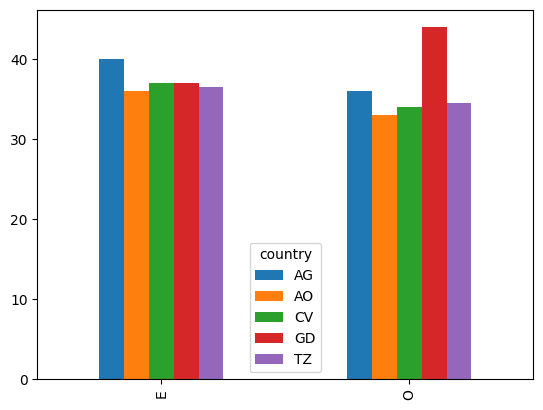

In [118]:
e_and_o.transpose().plot(kind='bar')

#### the last thing I want to do is pick out the 5 "happiest" countries and 5 "unhappiest" countries, and see how they stack up with all of the variables of OCEAN- and then stick the US in there as well

* happiest countries: finland, denmark, iceland, sweden, israel 
* unhappiest countries: afghanistan, lebanon, sierra leone, congo, zimbabwe

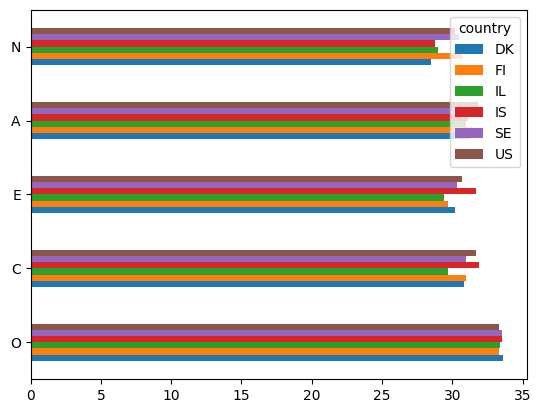

In [119]:
happiest = (
    big5_scored_df.query('country in ["US","FI","DK","IS","SE","IL"]').
        groupby('country')[['O','C','E','A','N']].
        agg('mean').
        round(1).
        transpose().
        plot(kind='barh')
)

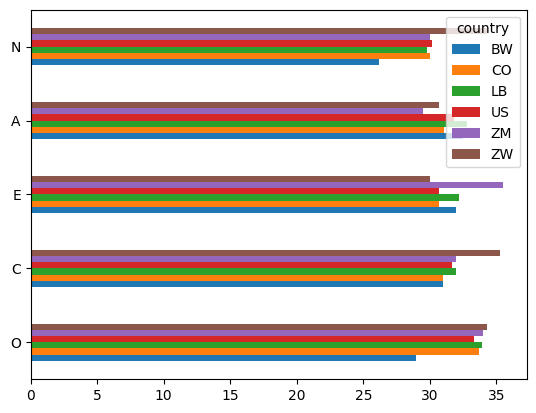

In [122]:
unhappiest = (
    big5_scored_df.query('country in ["US","LB","BW","CO","ZM","ZW"]').
        groupby('country')[['O','C','E','A','N']].
        agg('mean').
        round(1).
        transpose().
        plot(kind='barh')
)

#### afghanistan and sierra leone did not have data so I substituted zimbabwe and botswana

In [40]:
india_df = 

SyntaxError: invalid syntax (2577501113.py, line 1)

In [48]:
india_df.shape

NameError: name 'india_df' is not defined

<Axes: >

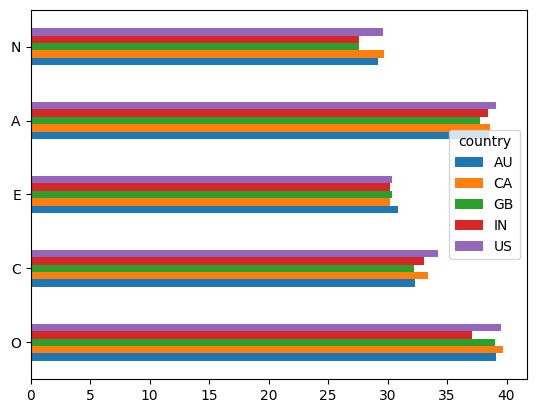

In [82]:
(
    big5_scored_df.query('country in ["US","GB","IN","AU","CA"]').
        groupby('country')[['O','C','E','A','N']].
        agg('mean').
        round(1).
        transpose().
        plot(kind='barh')
)

In [ ]:
(
    big5_scored_df.query('country in ["US","GB","IN","AU","CA"]').
        groupby('country')[['O','C','E','A','N']].
        agg('mean').
        round(1).
        transpose().
        plot(kind='barh')
)

In [83]:
 big5_scored_df.query('country=="IN"').shape

(1464, 64)

In [84]:
big5_scored_df.query('country in ["US","GB"]')

,race,age,engnat,gender,hand,source,country,E1,E2,E3,...,O8,O9,O10,race_cat,gender_cat,O,C,E,A,N
0,3,53,1,1,1,1,US,4,4,5,...,2,5,5,Caucasian (European),male,43,47,44,46,49
1,13,46,1,2,1,1,US,2,4,3,...,1,3,2,Other,female,26,42,22,35,29
4,11,25,2,2,1,2,US,3,5,3,...,1,5,3,"South East Asian (Chinese, Thai, Malay, Filipi...",female,34,34,34,44,30
5,13,31,1,2,1,2,US,1,1,2,...,4,5,3,Other,female,33,31,16,36,36
6,5,20,1,2,1,5,US,5,5,5,...,3,3,4,Caucasian (Middle East),female,41,28,46,45,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19712,3,19,1,2,1,3,US,4,5,5,...,2,3,5,Caucasian (European),female,39,30,40,48,43
19713,3,26,1,1,1,2,US,1,1,2,...,1,5,3,Caucasian (European),male,30,37,14,43,39
19715,3,37,1,2,1,2,US,2,3,2,...,2,3,3,Caucasian (European),female,30,32,25,36,39
19716,5,16,2,1,1,2,US,2,1,4,...,5,5,5,Caucasian (Middle East),male,37,23,21,26,10
